In [ ]:
# Import lybraries
import math
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from typing import Iterable, Optional

# GLACIER SIMULATOR

In [ ]:
# Sets All desired variables for the symulation
N = 1000000 # number of particles
a = 30 # cm lenght of the scintillator bars
b = 4  # cm width of the scintillator barss
s = 1  # cm height of the scintillator bars
c = 5  # cm distance between two top layers

First step: generating all starting points.

***HP1:*** incoming particles are uniformly distributed and are counted only if they can pass through all 3 detectors.

We should stato to focus on generating all possible incoming particle impact point on the top layer surface. This is simpler than generating all possible incoming direction coming from the sky.

Noticing that particle can also hit the sides of the scintillators and still be counted, we have also to count those kind of events. The easiest way to do so is to generate all hits on a larger surface given by the projection of the most horizontal particle that can be counted, on the first layer top surface.

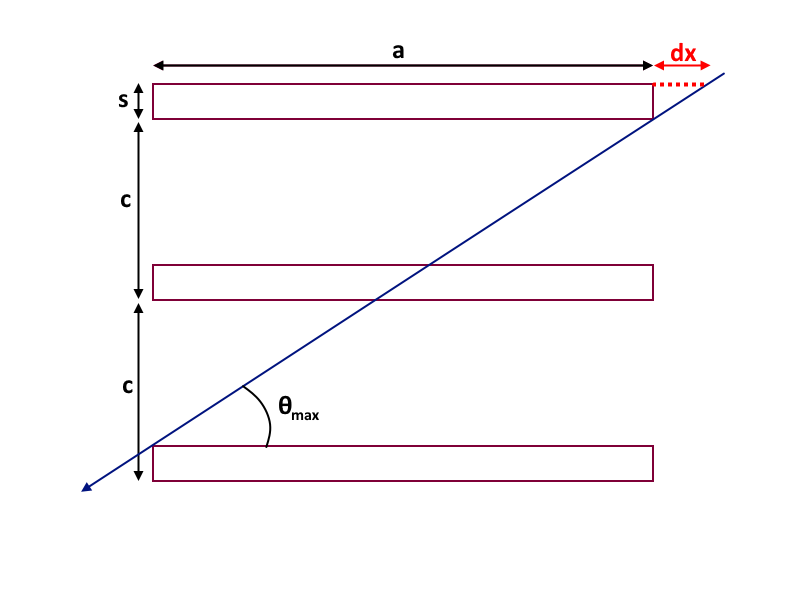

The enlargment is defined by adding 2 times dx and dy on the respective axis, where dx and dy are defined by the following equation that can be derived through simple geometry:

$$tg\left(θ_{max}\right)=\frac{a}{2c}=\frac{a+dx}{2c+s},$$

$$dx=\frac{s}{2c}a$$



In [ ]:
dx = s/(2*c)*a
dy = s/(2*c)*b

# Generates all particles positions on the top layer of the detector
x = np.array(np.random.rand(N))*(a+2*dx)
y = np.array(np.random.rand(N))*(b+2*dy)
z = np.array([2*c, c, 0.])

In [ ]:
# Function that can generate GLACIER plot: returns the figure object, the ax and the index of all plotted points
def plot_GLACIER(
    x: np.ndarray, # x position of the points
    y: np.ndarray, # y position of the points
    sample_idx: Optional[Iterable[int]] = None, # index of plotted points
    a: float = 30., # cm lenght of the scintillator bars
    b: float = 4., # cm width of the scintillator barss
    c: float = 5., # cm distance between two top layers
    s: float = 1., # cm height of the scintillator bars
    z_levels: tuple[float, float, float] = (0.0, 5.0, 10.0), # default spacing between planes
    figsize: tuple[float, float] = (8, 8),
    title: str = "GLACIER"):

    x = np.asarray(x)
    y = np.asarray(y)
    assert x.shape == y.shape, "x and y must have the same shape"
    N = len(x)

    # Plots only a subsample of the given points
    if sample_idx is not None:
        idx = np.array(list(sample_idx), dtype=int)
    else:
        # if the sample index is not set it gets the min between 250 and half the square root of N
        sample_size = min(int(np.sqrt(N)/2.), 250)
        rng = np.random.default_rng()
        idx = rng.choice(N, size=sample_size, replace=False)
    xs, ys = x[idx], y[idx]
    z_top = float(np.max(z_levels))
    dx = s/(2*c)*a
    dy = s/(2*c)*b
    xlim = (dx, a+dx)
    ylim = (dy, b+dy)

    # Draws GLACIER
    Charm_colors = ["#0000FF", "#00FF00", "#FF0000"]
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection="3d")
    for z, c in zip(z_levels, Charm_colors):
        if z == np.max(z_levels):
            verts = [[
            (xlim[0]-dx, ylim[0]-dy, z),
            (xlim[1]+dx, ylim[0]-dy, z),
            (xlim[1]+dx, ylim[1]+dy, z),
            (xlim[0]-dx, ylim[1]+dy, z),
            ]]
        else:
            verts = [[
            (xlim[0], ylim[0], z),
            (xlim[1], ylim[0], z),
            (xlim[1], ylim[1], z),
            (xlim[0], ylim[1], z),
            ]]
        poly = Poly3DCollection(verts, facecolors=c, alpha=0.5,  linewidths=0.5)
        ax.add_collection3d(poly)

    # Adds the sampled points
    ax.scatter(xs, ys, np.full_like(xs, z_top), s=20)
    ax.set_title(title, fontweight='bold', fontsize=22)
    ax.set_xlabel("x [cm]", fontweight='bold', fontsize=18)
    ax.set_ylabel("y [cm]", fontweight='bold', fontsize=18)
    ax.set_zlabel("z [cm]", fontweight='bold', fontsize=18)
    ax.set_xlim(-2., max(np.max(x), np.max(y)))
    ax.set_ylim(-2., max(np.max(x), np.max(y)))
    dz = (max(z_levels) - min(z_levels)) * 0.1
    ax.set_zlim(min(z_levels) - dz, max(z_levels) + dz)
    plt.show()

    return fig, ax, idx

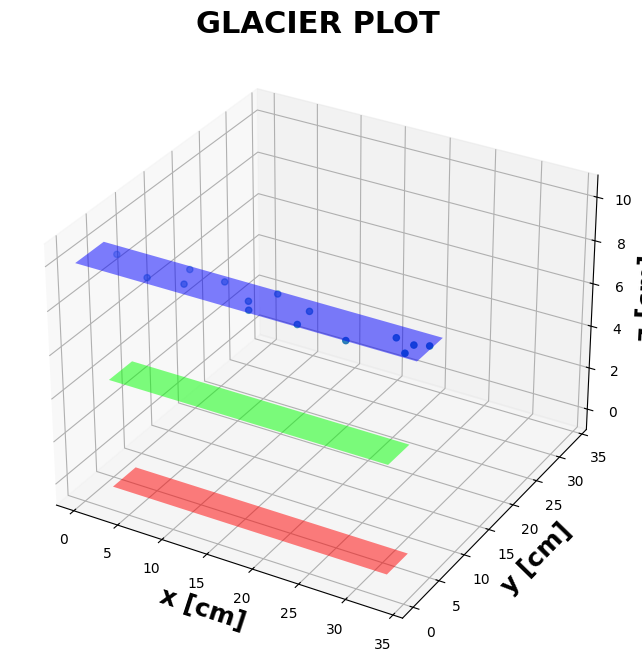

In [ ]:
fig, ax, idx = plot_GLACIER(x, y, z_levels=z, sample_idx=np.arange(0,15,1), title="GLACIER PLOT")

Now we need to define the direction of each incoming particle.

Given the vector: $$\vec{v}=\left(l, m, n\right)=\left(sinθcosϕ, sinθsinϕ, cosθ\right)\text{ with }\theta\in\left[0,\frac{\pi}{2}\right],\, \phi\in\left[0,2\pi\right[$$

we can define the parametric line:
$$ \left\{\begin{matrix}
x-x_{0}=t\cdot l \\
y-y_{0}=t\cdot m \\
z-z_{0}=t\cdot n
\end{matrix}\right.$$

In [ ]:
# Generates the direction of the incoming particles
theta = np.array(np.random.rand(N)*np.pi/2.)
phi = np.array(np.random.rand(N)*2*np.pi)

# Defines the vector of the 3D-line (particle direction)
l = np.sin(theta)*np.cos(phi)
m = np.sin(theta)*np.sin(phi)
n = np.cos(theta)

A signal is defined as a particle passing through all 3 detectors. This means hitting the top layer and the bottom layer in any possible way.

In [ ]:
# intercept the bottom plane
t = (z[-1]-z[0])/n
x0 = l*t + x
y0 = m*t + y

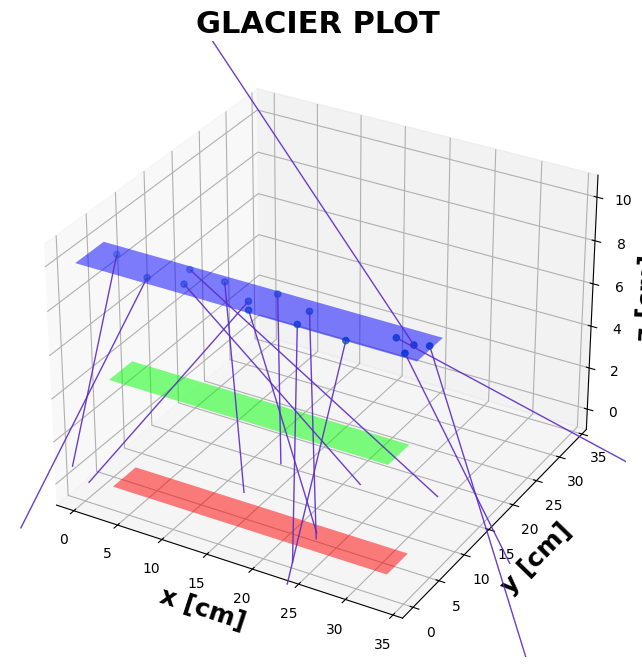

In [ ]:
# visualize some incoming particles
segments = [ [(x0[j], y0[j], z[-1]), (x[j], y[j], z[0])] for j in idx ]
lc = Line3DCollection(segments, linewidths=1, alpha=0.9, colors="#5A2ACA")
ax.add_collection3d(lc)
display(fig)

In [ ]:
signal = np.where((dx<x0) & (x0<a+dx) & (dy<y0) & (y0<b+dy))[0]
print(f"Particle generated: {N}")
print(f"Particle counted:   {len(signal)}")
G = len(signal)/N
print(f"Angular Coverage: {round(G*100,2)} %, meaning {round(4*np.pi*G,2)} str.")
print(f"Acceptance: {round(4*np.pi*G*a*b,2)} cm^2")

Particle generated: 1000000
Particle counted:   184162
Angular Coverage: 18.42 %, meaning 2.31 str.
Acceptance: 277.71 cm^2
